In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/JhesorleyML/Lectures/refs/heads/main/Time%20Series%20Forecasting/Seasonal_sample.csv")

In [15]:
df.head()

,Time,Sales
0,2021-01,80
1,2021-02,90
2,2021-03,100
3,2021-04,110
4,2021-05,120


In [16]:
df["Time"]= pd.to_datetime(df["Time"])
df = df.set_index("Time")

In [18]:
df["Month"] =  df.index.month
overall_avg = df["Sales"].mean()
monthly_avg = df.groupby("Month")["Sales"].mean()

seasonal_index = monthly_avg / overall_avg
print(seasonal_index)

Month
1     0.664495
2     0.742671
3     0.820847
4     0.899023
5     0.977199
6     1.055375
7     1.133550
8     1.094463
9     1.016287
10    0.938111
11    1.211726
12    1.446254
Name: Sales, dtype: float64


In [19]:
# Attach seasonal index back to dataframe
df["SI"] = df["Month"].map(seasonal_index)

In [20]:
#deseasonalized
df["Deseasonalized"] = df["Sales"] / df["SI"]

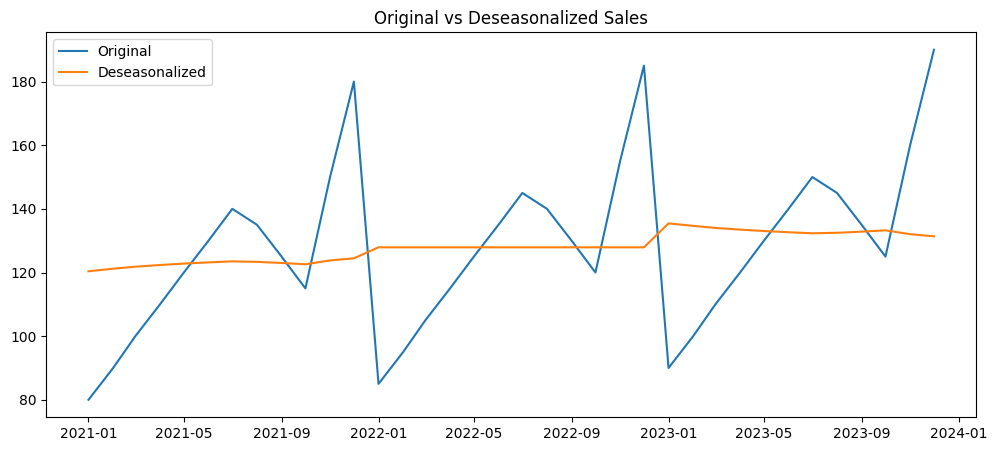

In [21]:
#plot comparison
plt.figure(figsize=(12,5))

plt.plot(df["Sales"], label="Original")
plt.plot(df["Deseasonalized"], label="Deseasonalized")

plt.legend()
plt.title("Original vs Deseasonalized Sales")
plt.show()

## LEAST SQUARED METHOD

In [23]:
# Create a time index t = 1, 2, 3, ..., N
# This represents time steps (e.g., months)
df["t"] = range(1, len(df)+1)

In [24]:
# Fit a straight line y = a + b*t using least squares
b, a = np.polyfit(df["t"], df["Sales"],1)

In [25]:
# Compute the fitted trend value for each time t
df["Trend"] = a + b * df["t"]

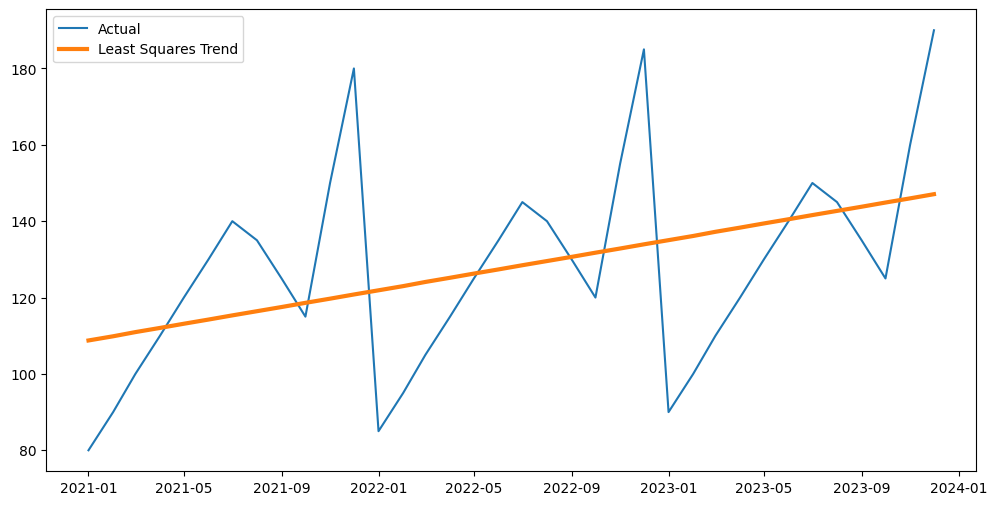

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df["Sales"], label="Actual")
plt.plot(df["Trend"], label="Least Squares Trend", linewidth=3)

plt.legend()
plt.show()

## MOVING AVERAGE

In [25]:
#Simple moving average (3-month)
#12 month moving average (trend extraction)
#plot smooth vs original

In [27]:
#3-month moving average
df["MA_3"] = df["Sales"].rolling(window = 3, center = True).mean()

In [28]:
#12-month moving average
df["MA_12"] = df["Sales"].rolling(window = 12).mean()

In [29]:
#centered moving average because 12 is even
df["MA_12_centered"] = df["MA_12"].rolling(2).mean()

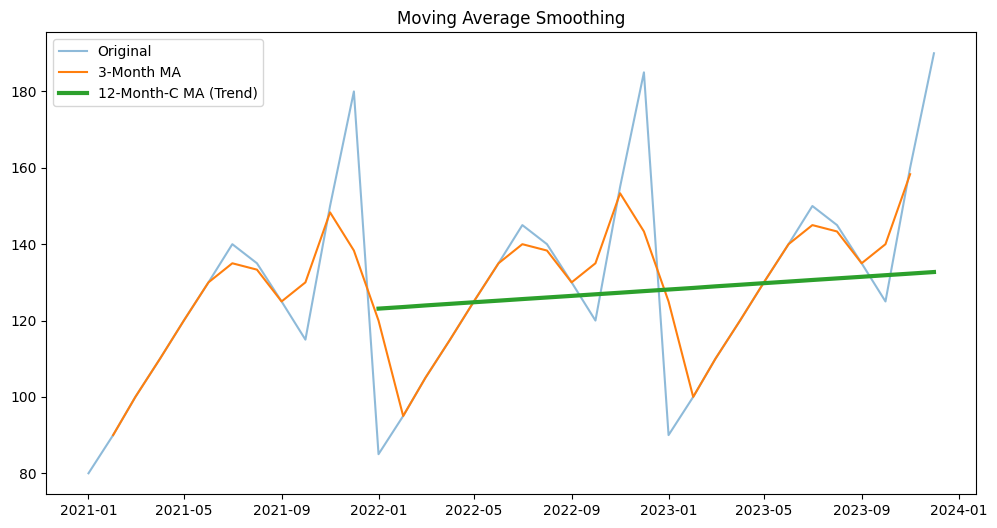

In [30]:
plt.figure(figsize=(12,6))

plt.plot(df["Sales"], label="Original", alpha=0.5)
plt.plot(df["MA_3"], label="3-Month MA")
plt.plot(df["MA_12_centered"], label="12-Month-C MA (Trend)", linewidth=3)

plt.legend()
plt.title("Moving Average Smoothing")
plt.show()